In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\New Datasets\Brazilian House Rent\houses_to_rent_v2.csv")
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
df.shape

(10692, 13)

In [4]:
df.nunique()

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [9]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [6]:
# Here our Target Variable is "Rent Amount", we need to check relation of each contributing factor with this target variable

Text(0,0.5,'Rent')

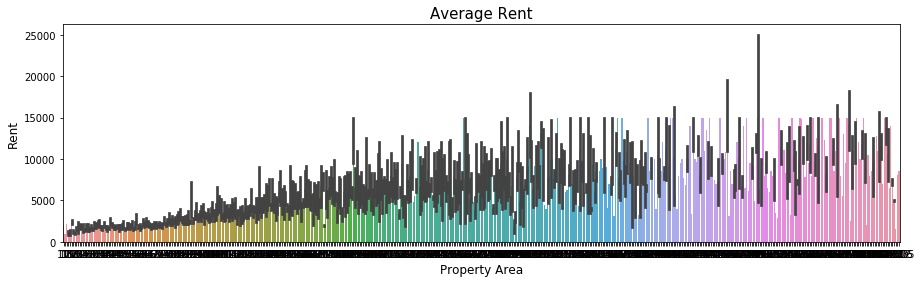

In [7]:
# Let's try to analyze area - rent relationship
plt.figure(figsize=(15,4))
sns.barplot(x='area',y='rent amount (R$)',data=df,)
plt.title("Average Rent",fontsize=15)
plt.xlabel("Property Area",fontsize=12)
plt.ylabel("Rent",fontsize=12)

In [8]:
# There is a clear increasing trend in rent amount as the area of the property increases. We can verify this with our own 
# understanding of this relation as the size of the property increases so does the rent amount.

# There are some fluctuations as well, that could be bcuz of the property surroundings, like locality,access to superstores,
# access to parks and many more things, we do not have such data to deep dive into that kind of analysis.

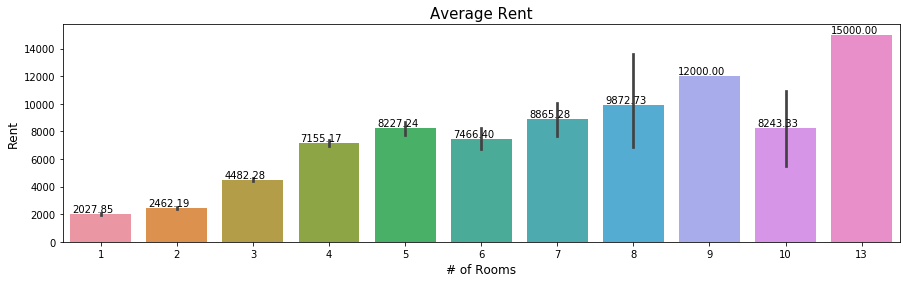

In [11]:
# Let's try to analyze the #Rooms - RentAmount relationship
plt.figure(figsize=(15,4))
graph = sns.barplot(x='rooms',y='rent amount (R$)',data=df)
plt.title("Average Rent",fontsize=15)
plt.xlabel("# of Rooms",fontsize=12)
plt.ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

In [12]:
# There is almost an increasing trend in rent amount as the # of rooms in property increases, except there is a sharp
# decrease for 10 rooms and the maximum of that does not even reach the average rent amount for 9 rooms, we need to analyze 
# why is there a sharp decrease by comparing the data having 9 rooms and 13 rooms.

# I have a strong doubt that there could be only 1 value for each of #Rooms=9 and #Rooms=13

In [50]:
print(len(df[df['rooms']==9]))
print(len(df[df['rooms']==13]))

1
1


In [51]:
# There we go our doubt has turned out to be true. As there is only 1 value for each of them, we cannot say that there avg.
# rent amounts lie at these values and dip could be because of locality and connectedness to the amenities as house with 10
# rooms would require a large space and that is mostly not available in the core of the city, usually these places are
# located at the outskirts or a little bit far from the main city.

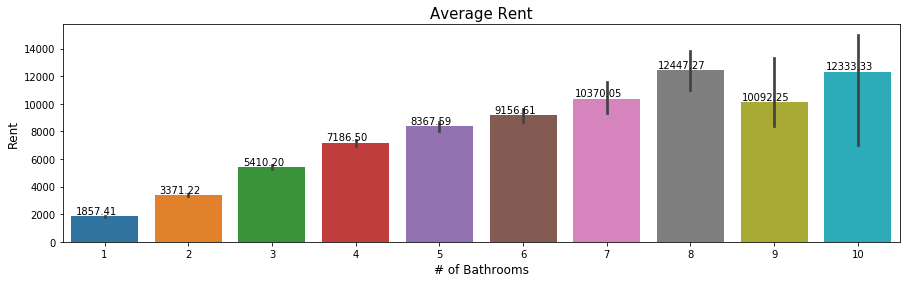

In [13]:
# Let's try to analyze the #Bathrooms - RentAmount relationship
plt.figure(figsize=(15,4))
graph = sns.barplot(x='bathroom',y='rent amount (R$)',data=df)
plt.title("Average Rent",fontsize=15)
plt.xlabel("# of Bathrooms",fontsize=12)
plt.ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

In [14]:
# There is an increasing trend in rent amount as the # of bathrooms increases, but why is that? Do people want more bathroom
# in their house or is it some how related to the number of rooms, that there should be a separate bathroom for each room.
# We need to check that how bathrooms, rooms, and rent amount are correlated to each other.

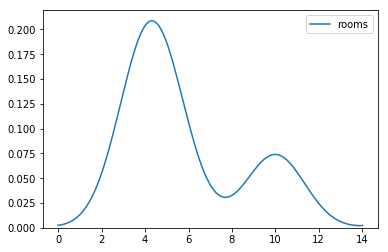

In [63]:
x1 = df[df['bathroom']==9]
sns.kdeplot(x1['rooms'])

In [62]:
# One of the reasons for low rent amount for houses with 9 bathrooms could be that there are significant number of houses
# with bathrooms less than 8, which could lead to the issue of using sharing bathrooms and trust me not a lot of people like
# that, including me.

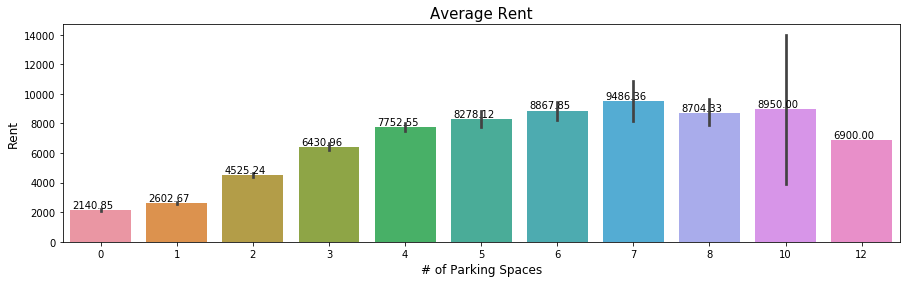

In [15]:
# Let's try to analyze the #ParkingSpaces - RentAmount relationship
plt.figure(figsize=(15,4))
graph = sns.barplot(x='parking spaces',y='rent amount (R$)',data=df)
plt.title("Average Rent",fontsize=15)
plt.xlabel("# of Parking Spaces",fontsize=12)
plt.ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

In [16]:
# There is an increasing trend in rent amount till 7 parking spaces, however after that it starts decreasing, which is quite
# interesting relation to understand as it could be because of several reasons:-

# 1. It could be bcuz most of the property area is getting occupied by the parking space
# 2. It could be bcuz as the number of rooms increases, so does the tenants and their vehicles, which could lead to parking
#    space issues and that could be the reason people do not opt to rent such large houses.

# Unfortunately we do not have such data with us, so we would not be able to explore this into depth however, we could still
# analyze their relationship with the # of rooms.

Text(0.5,1,'Parking Spaces = 12')

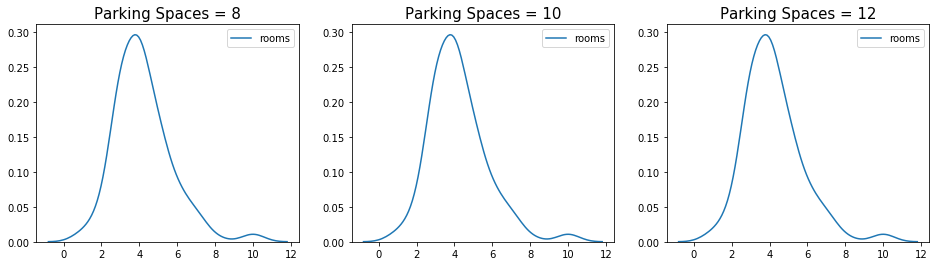

In [65]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

x1 = df[df['parking spaces']==8]
x2 = df[df['parking spaces']==9]
x3 = df[df['parking spaces']==10]
sns.kdeplot(x1['rooms'],ax=axes[0])
axes[0].set_title("Parking Spaces = 8",fontsize=15)

sns.kdeplot(x1['rooms'],ax=axes[1])
axes[1].set_title("Parking Spaces = 10",fontsize=15)

sns.kdeplot(x1['rooms'],ax=axes[2])
axes[2].set_title("Parking Spaces = 12",fontsize=15)

In [66]:
# The relationship is as the number of rooms increases so should the number of parking spaces, but that is not the case with
# our data, and that is the reason of dip in the rent amount.

Text(0,0.5,'Rent')

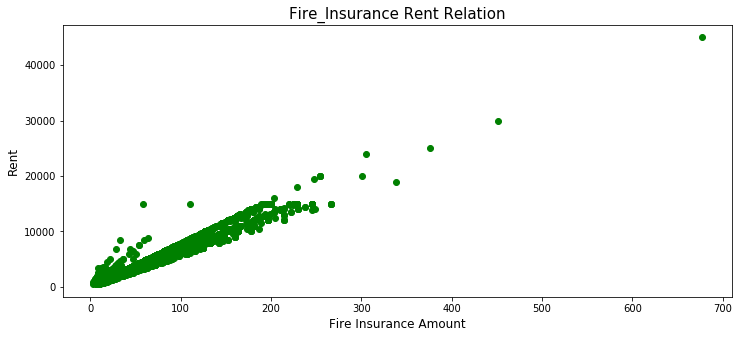

In [21]:
# hoa and property_tax is something which a tenant would not be paying, so we need to worry less about these 2 columns, 
# however we could still analyze the relation of fire insurance with the rent amount.
plt.figure(figsize=(12,5))
plt.scatter(x=df['fire insurance (R$)'],y=df['rent amount (R$)'],data=df,color='green')
plt.title("Fire_Insurance Rent Relation",fontsize=15)
plt.xlabel("Fire Insurance Amount",fontsize=12)
plt.ylabel("Rent",fontsize=12)

In [20]:
# There is an increasing trend in rent amount as the fire insurance amount increases, this is an obvious relation as higher
# the amount paid for security more will be the rent for that place.

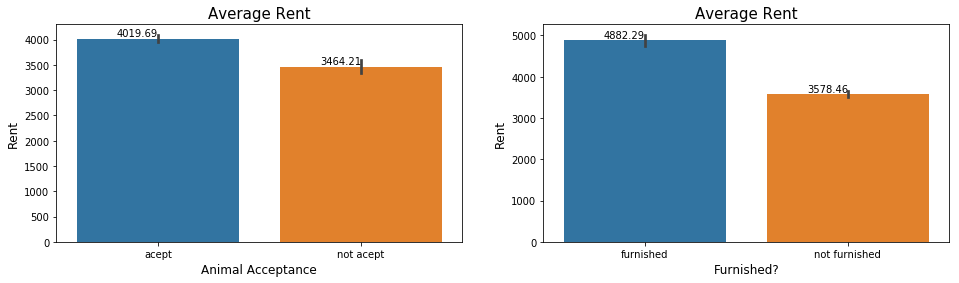

In [23]:
# Let's try and analyze AnimalAcceptance - RentAmount relation and FurnishedHouse - RentAmount relation
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,2, figsize=(16,4))

graph = sns.barplot(x='animal',y='rent amount (R$)',data=df,ax=axes[0])
axes[0].set_title("Average Rent",fontsize=15)
axes[0].set_xlabel("Animal Acceptance",fontsize=12)
axes[0].set_ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='furniture',y='rent amount (R$)',data=df,ax=axes[1])
axes[1].set_title("Average Rent",fontsize=15)
axes[1].set_xlabel("Furnished?",fontsize=12)
axes[1].set_ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

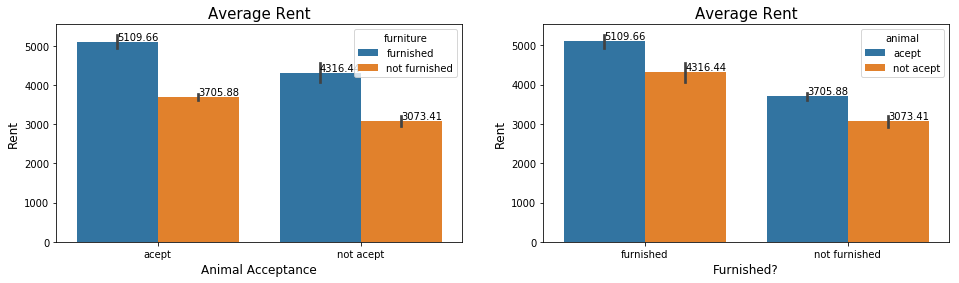

In [24]:
# From this we could say that as more special amenities are added, the rent amount increases. We could also try to visualize
# something like this:-
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,2, figsize=(16,4))

graph = sns.barplot(x='animal',y='rent amount (R$)',hue='furniture',data=df,ax=axes[0])
axes[0].set_title("Average Rent",fontsize=15)
axes[0].set_xlabel("Animal Acceptance",fontsize=12)
axes[0].set_ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='furniture',y='rent amount (R$)',hue='animal',data=df,ax=axes[1])
axes[1].set_title("Average Rent",fontsize=15)
axes[1].set_xlabel("Furnished?",fontsize=12)
axes[1].set_ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

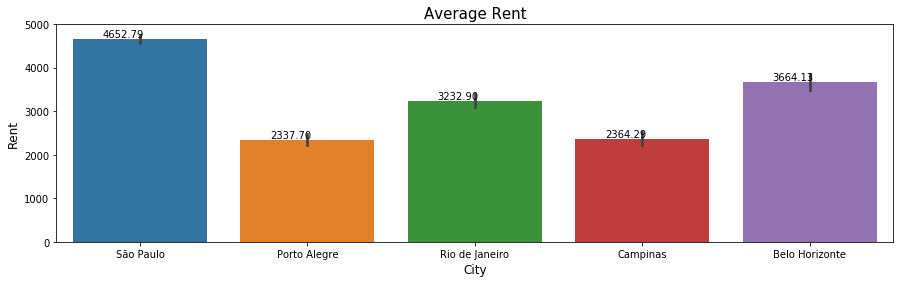

In [27]:
# Let's try to analyze city - rent relationship
plt.figure(figsize=(15,4))
graph = sns.barplot(x='city',y='rent amount (R$)',data=df)
plt.title("Average Rent",fontsize=15)
plt.xlabel("City",fontsize=12)
plt.ylabel("Rent",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

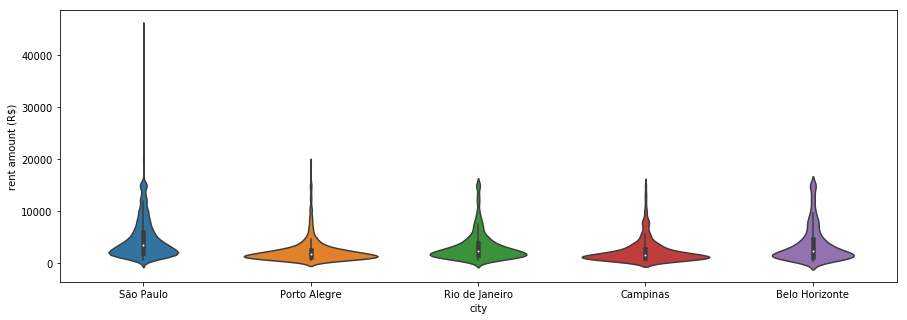

In [47]:
plt.figure(figsize=(15,5))
sns.violinplot(x='city',y='rent amount (R$)',data=df)

In [48]:
# Most of the rent amount lies somewhere between 2000 to 3000 and there are few outliers as well.
# We need to see how we should deal with these outliers.

Text(0.5,1,'Belo Horizonte')

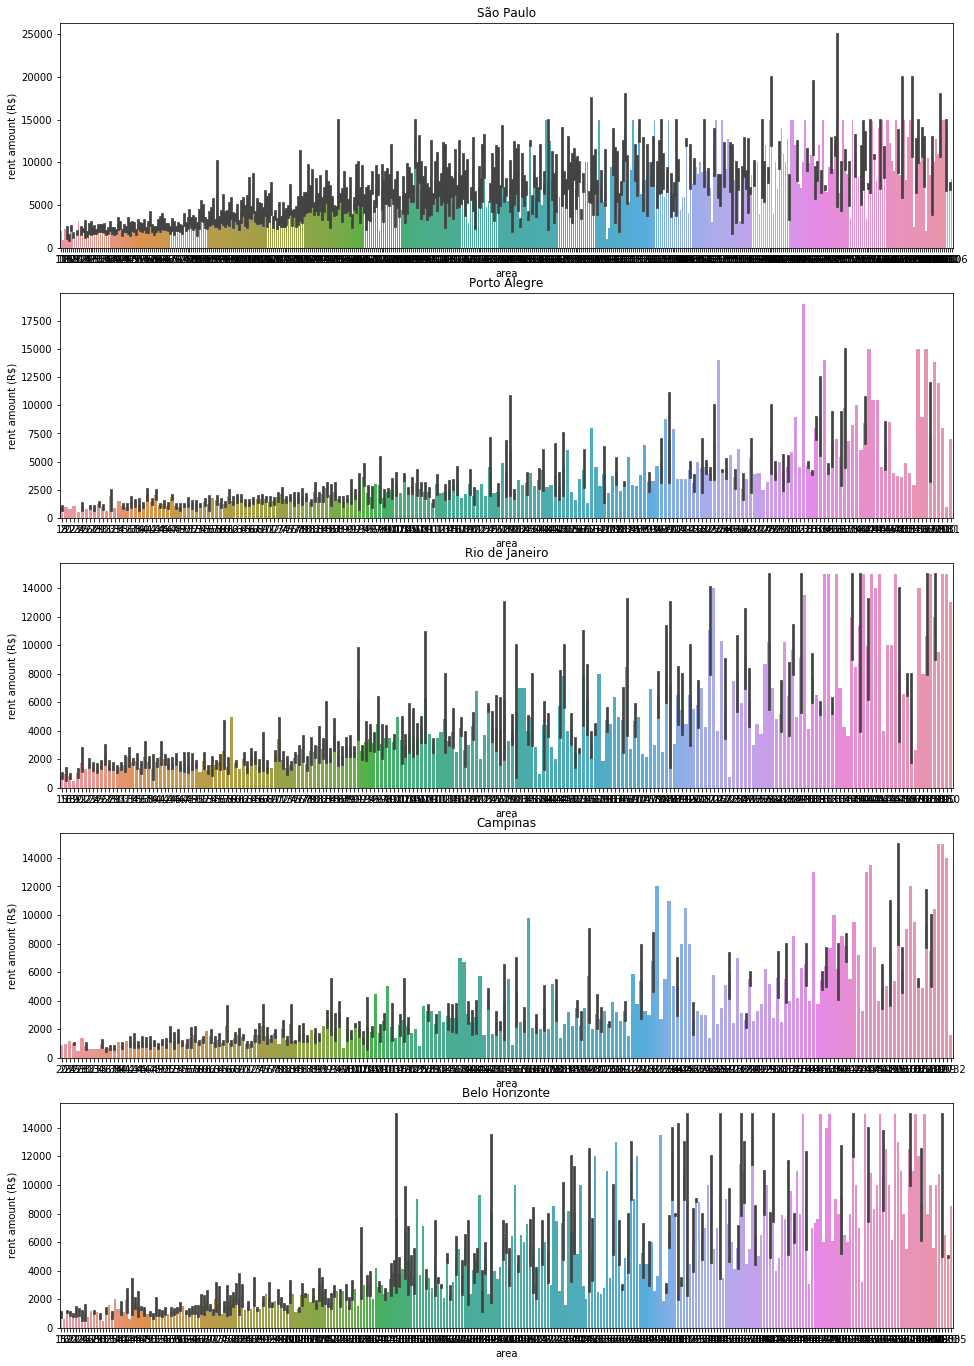

In [31]:
# We want to see the impact of area on rent amount in a particular city
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(5,1, figsize=(16,24))

df_Sau_Paulo = df[df['city']=='São Paulo']
sns.barplot(x='area',y='rent amount (R$)',data=df_Sau_Paulo,ax=axes[0])
axes[0].set_title("São Paulo",fontsize=12)

df_Porto_Alegre = df[df['city']=='Porto Alegre']
sns.barplot(x='area',y='rent amount (R$)',data=df_Porto_Alegre,ax=axes[1])
axes[1].set_title("Porto Alegre",fontsize=12)

df_Rio_de_Janeiro = df[df['city']=='Rio de Janeiro']
sns.barplot(x='area',y='rent amount (R$)',data=df_Rio_de_Janeiro,ax=axes[2])
axes[2].set_title("Rio de Janeiro",fontsize=12)

df_Campinas = df[df['city']=='Campinas']
sns.barplot(x='area',y='rent amount (R$)',data=df_Campinas,ax=axes[3])
axes[3].set_title("Campinas",fontsize=12)

df_Belo_Horizonte = df[df['city']=='Belo Horizonte']
sns.barplot(x='area',y='rent amount (R$)',data=df_Belo_Horizonte,ax=axes[4])
axes[4].set_title("Belo Horizonte",fontsize=12)

In [32]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


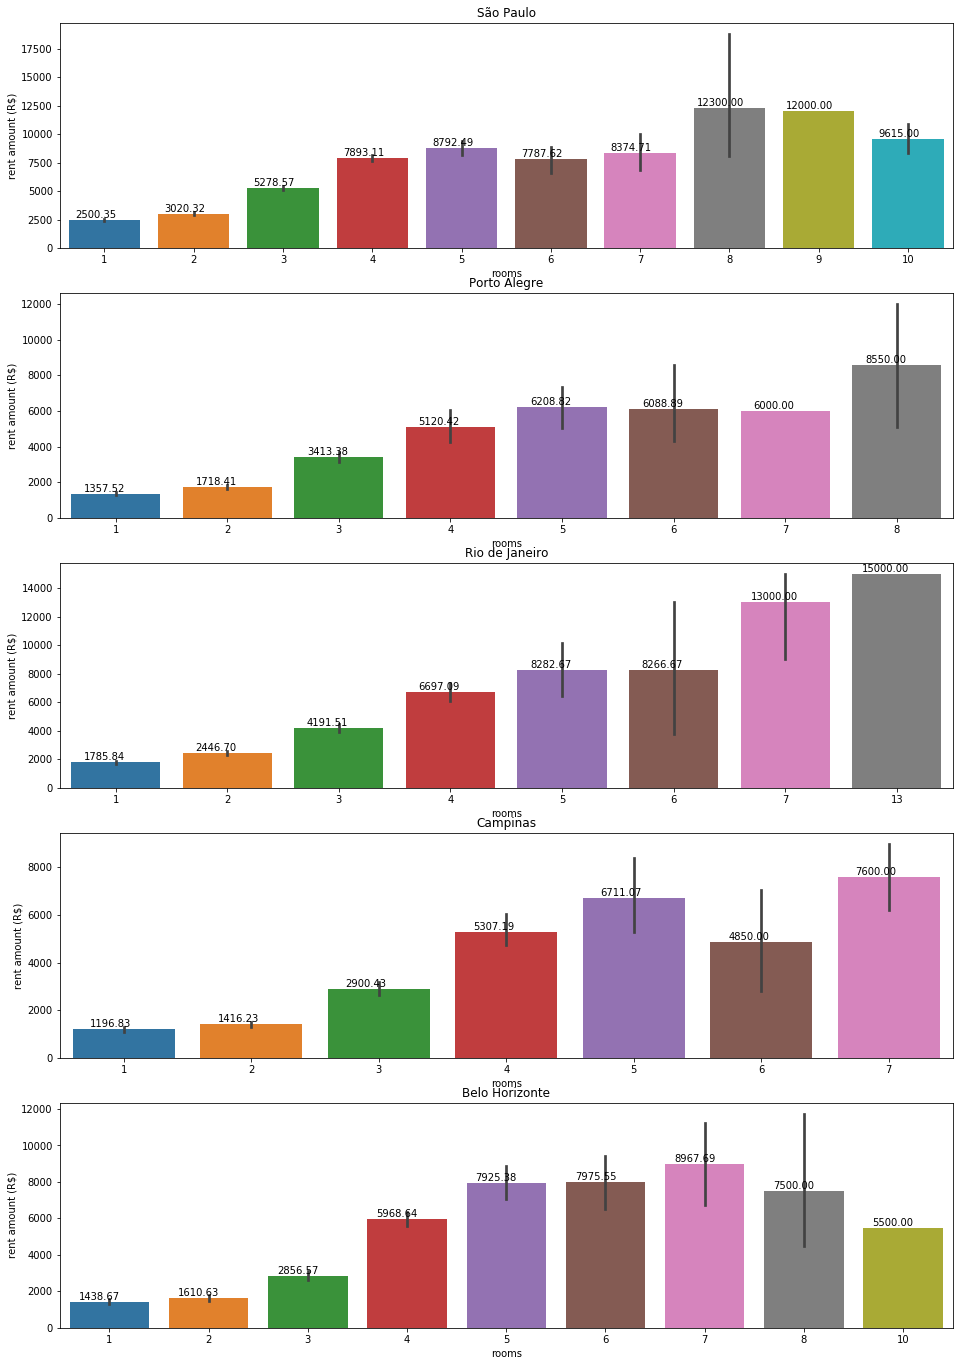

In [35]:
# We want to analyze impact of # of rooms on RentAmount in a particular city
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(5,1, figsize=(16,24))

graph = sns.barplot(x='rooms',y='rent amount (R$)',data=df_Sau_Paulo,ax=axes[0])
axes[0].set_title("São Paulo",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='rooms',y='rent amount (R$)',data=df_Porto_Alegre,ax=axes[1])
axes[1].set_title("Porto Alegre",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='rooms',y='rent amount (R$)',data=df_Rio_de_Janeiro,ax=axes[2])
axes[2].set_title("Rio de Janeiro",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='rooms',y='rent amount (R$)',data=df_Campinas,ax=axes[3])
axes[3].set_title("Campinas",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='rooms',y='rent amount (R$)',data=df_Belo_Horizonte,ax=axes[4])
axes[4].set_title("Belo Horizonte",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

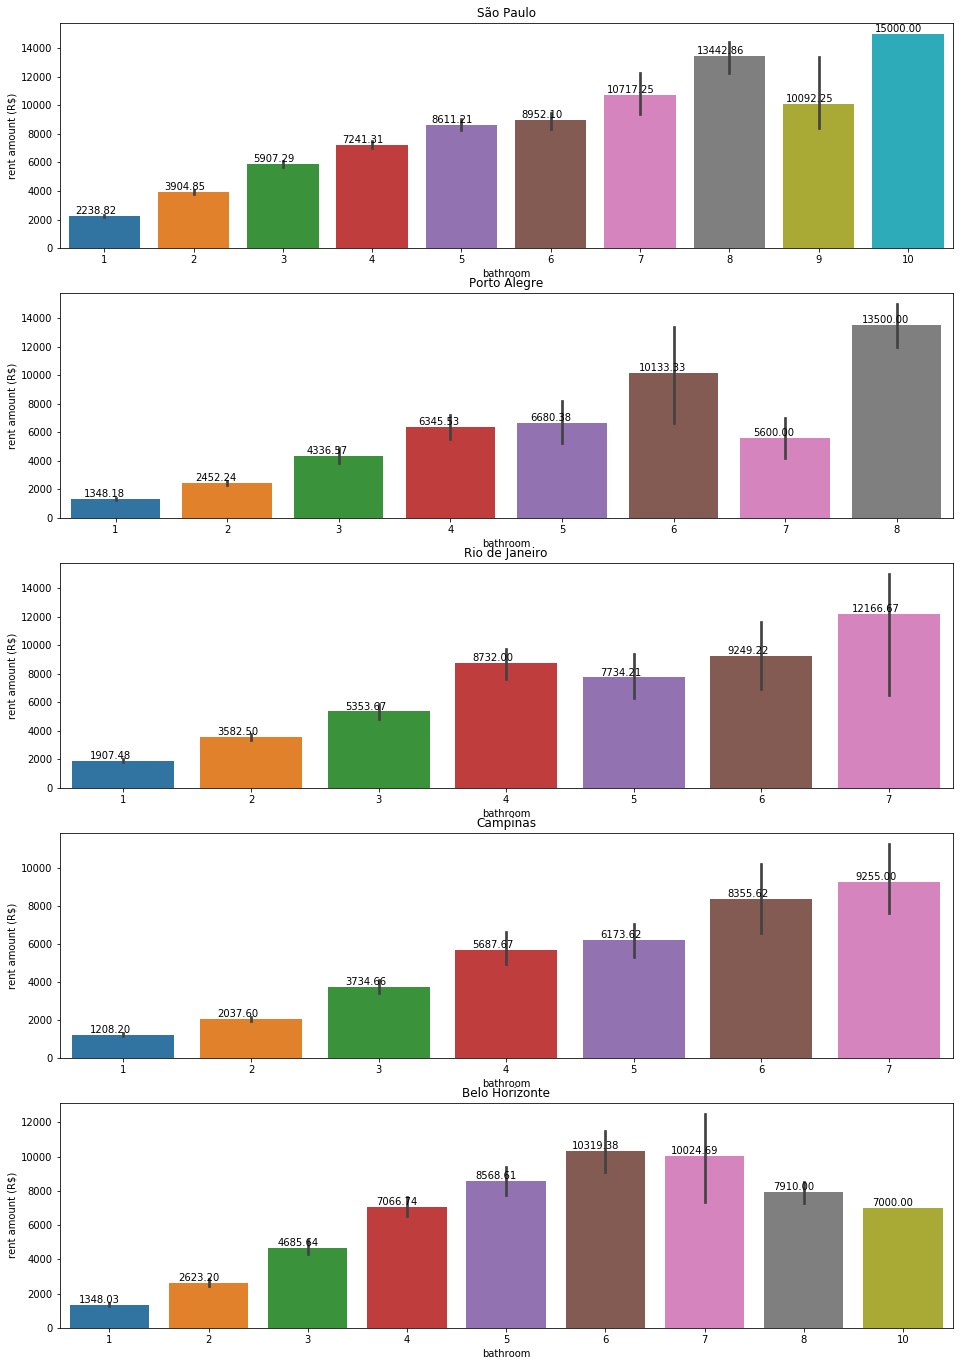

In [36]:
# We want to analyze impact of # of bathrooms on RentAmount in a particular city
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(5,1, figsize=(16,24))

graph = sns.barplot(x='bathroom',y='rent amount (R$)',data=df_Sau_Paulo,ax=axes[0])
axes[0].set_title("São Paulo",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='bathroom',y='rent amount (R$)',data=df_Porto_Alegre,ax=axes[1])
axes[1].set_title("Porto Alegre",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='bathroom',y='rent amount (R$)',data=df_Rio_de_Janeiro,ax=axes[2])
axes[2].set_title("Rio de Janeiro",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='bathroom',y='rent amount (R$)',data=df_Campinas,ax=axes[3])
axes[3].set_title("Campinas",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='bathroom',y='rent amount (R$)',data=df_Belo_Horizonte,ax=axes[4])
axes[4].set_title("Belo Horizonte",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

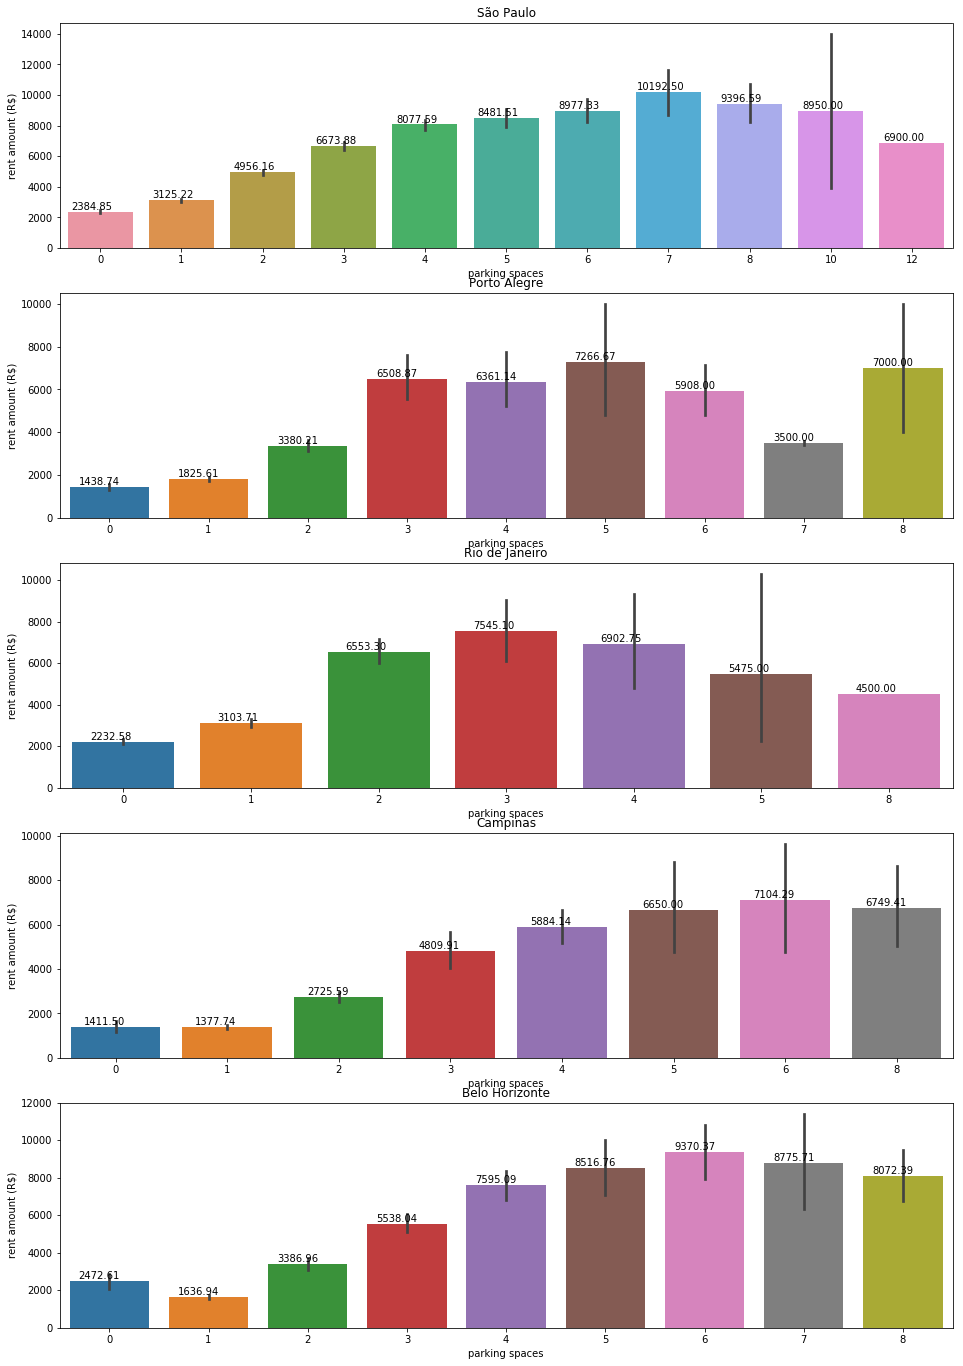

In [37]:
# We want to analyze impact of # of parking spaces on RentAmount in a particular city
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(5,1, figsize=(16,24))

graph = sns.barplot(x='parking spaces',y='rent amount (R$)',data=df_Sau_Paulo,ax=axes[0])
axes[0].set_title("São Paulo",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='parking spaces',y='rent amount (R$)',data=df_Porto_Alegre,ax=axes[1])
axes[1].set_title("Porto Alegre",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='parking spaces',y='rent amount (R$)',data=df_Rio_de_Janeiro,ax=axes[2])
axes[2].set_title("Rio de Janeiro",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='parking spaces',y='rent amount (R$)',data=df_Campinas,ax=axes[3])
axes[3].set_title("Campinas",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='parking spaces',y='rent amount (R$)',data=df_Belo_Horizonte,ax=axes[4])
axes[4].set_title("Belo Horizonte",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

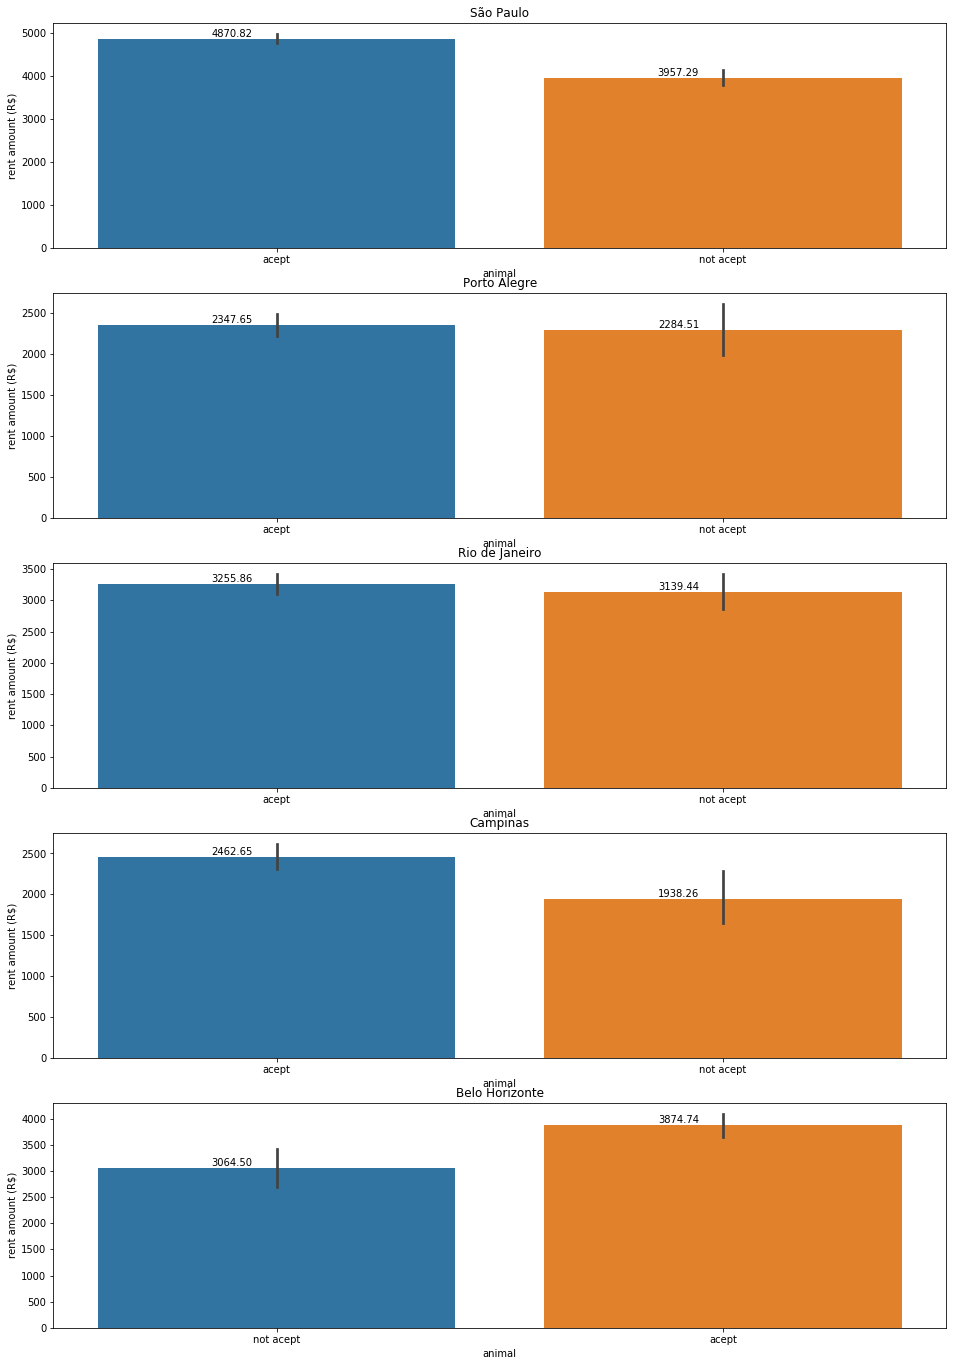

In [38]:
# We want to analyze impact of AnimalAcceptance on RentAmount in a particular city
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(5,1, figsize=(16,24))

graph = sns.barplot(x='animal',y='rent amount (R$)',data=df_Sau_Paulo,ax=axes[0])
axes[0].set_title("São Paulo",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='animal',y='rent amount (R$)',data=df_Porto_Alegre,ax=axes[1])
axes[1].set_title("Porto Alegre",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='animal',y='rent amount (R$)',data=df_Rio_de_Janeiro,ax=axes[2])
axes[2].set_title("Rio de Janeiro",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='animal',y='rent amount (R$)',data=df_Campinas,ax=axes[3])
axes[3].set_title("Campinas",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='animal',y='rent amount (R$)',data=df_Belo_Horizonte,ax=axes[4])
axes[4].set_title("Belo Horizonte",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

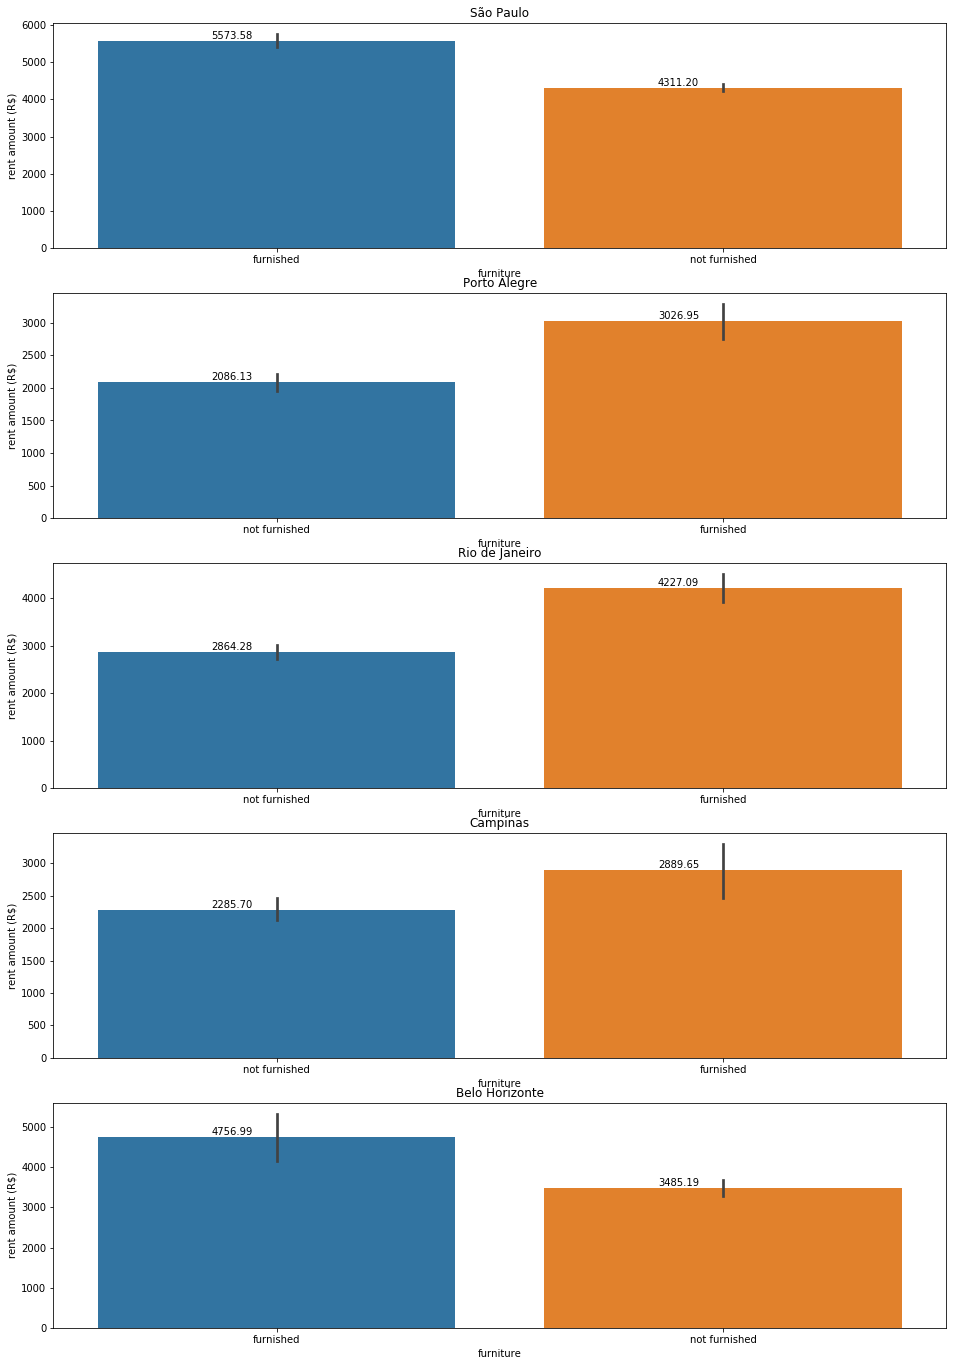

In [39]:
# We want to analyze impact of FurnishedAprtment on RentAmount in a particular city
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(5,1, figsize=(16,24))

graph = sns.barplot(x='furniture',y='rent amount (R$)',data=df_Sau_Paulo,ax=axes[0])
axes[0].set_title("São Paulo",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='furniture',y='rent amount (R$)',data=df_Porto_Alegre,ax=axes[1])
axes[1].set_title("Porto Alegre",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='furniture',y='rent amount (R$)',data=df_Rio_de_Janeiro,ax=axes[2])
axes[2].set_title("Rio de Janeiro",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='furniture',y='rent amount (R$)',data=df_Campinas,ax=axes[3])
axes[3].set_title("Campinas",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='furniture',y='rent amount (R$)',data=df_Belo_Horizonte,ax=axes[4])
axes[4].set_title("Belo Horizonte",fontsize=12)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

In [67]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [69]:
# Homeowners Association Tax in layman terms is something like a person/organization is taking care of maintaining the 
# society flats/apartments/houses and the income generated by these caretakers/maintainers are being taxable at flat 30%,
# for which return can be filed under form 1120-H.

# So, this is related to someone else's income and has nothing to do with the rent amount a tenant should be paying.
# And, property tax is something which owner has to pay on the basis of area of the property and has nothing to do with the
# rent amount to be paid by the tenant.

# Above mentioned are the reason we are not exploring these 2 variables and will be dropping them when we build our model.

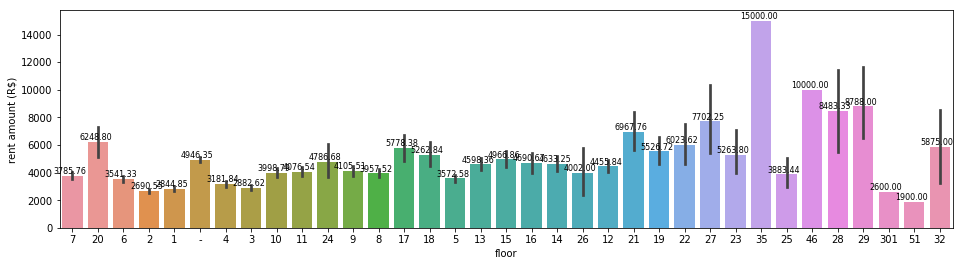

In [72]:
# Now, there is only one thing left to analyze which is Floor - RentAmount relationship. Let's do that.
plt.figure(figsize=(16,4))
graph = sns.barplot(x='floor',y='rent amount (R$)',data=df)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black',fontsize=8)

In [74]:
# There is no specific increasing or decresing relationship between them, the rent amount is spread across different floors,
# this could be because of the reason that now-a-days lifts are available and any floor can be accessed easily by them.

# As this is not so relevant for our prediction, we might be able to drop this column if this does not have a good
# correlation with the target variable.

In [97]:
df['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [98]:
len(df[df['floor']=='-'])

2461

In [99]:
# We have to deal with 2 things here:-
# 1. Where value = '301' --> This we can drop as there is single record with this value
# 2. Where value = '-' --> This we cannot remove as there are many values ~24%. Instead we can remove this column or replace
#                          '-' with mode of the column. Or this could just be '0'th/ground floor.

In [100]:
df['floor'].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
35        1
46        1
Name: floor, dtype: int64

In [101]:
# Replacing '-' with 0 as there is a strong possibility, on the basis of trend in the value counts for each floor, that
# this value will be 0.
df = df[df['floor']!='301']
df['floor'].replace({'-':'0'},inplace=True)
df['floor'] = df['floor'].astype(int)
df['floor'].unique()

array([ 7, 20,  6,  2,  1,  0,  4,  3, 10, 11, 24,  9,  8, 17, 18,  5, 13,
       15, 16, 14, 26, 12, 21, 19, 22, 27, 23, 35, 25, 46, 28, 29, 51, 32],
      dtype=int64)

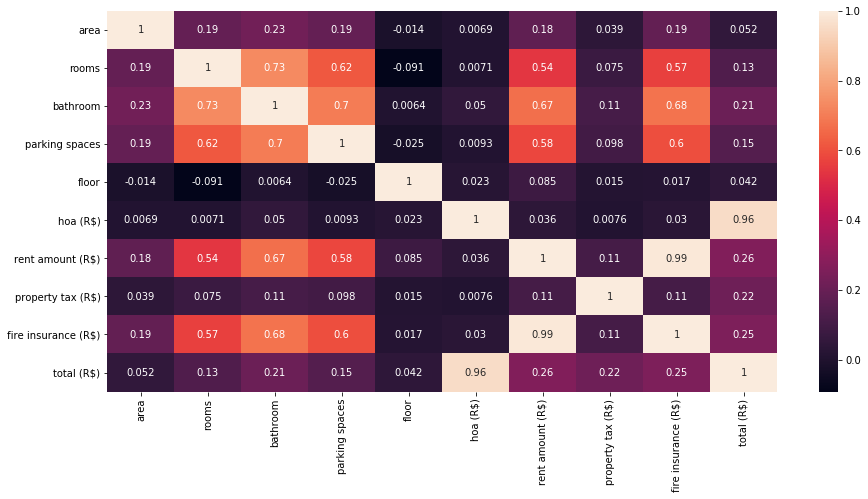

In [82]:
# Let's check correlation of each of the independent variable with the target variable
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [102]:
city = pd.get_dummies(df['city'],drop_first=True)
df.drop('city',axis=1,inplace=True)
city.head()

,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [103]:
# As said earlier, by looking at this we could say that floor does not have any coorelation with the Target Variable and we
# can drop this column alongwith hoa and property_tax.
# We will still keep total (R$) column in our dataset, and try to create column with and without this column.
df.drop(columns=['floor','hoa (R$)','property tax (R$)'],axis=1,inplace=True)
df.head()

,area,rooms,bathroom,parking spaces,animal,furniture,rent amount (R$),fire insurance (R$),total (R$)
0,70,2,1,1,acept,furnished,3300,42,5618
1,320,4,4,0,acept,not furnished,4960,63,7973
2,80,1,1,1,acept,not furnished,2800,41,3841
3,51,2,1,0,acept,not furnished,1112,17,1421
4,25,1,1,0,not acept,not furnished,800,11,836


In [104]:
df['furniture'].unique()

array(['furnished', 'not furnished'], dtype=object)

In [105]:
df['animal'].replace({'acept':0,'not acept':1},inplace=True)
df['furniture'].replace({'furnished':0,'not furnished':1},inplace=True)
df.head()

,area,rooms,bathroom,parking spaces,animal,furniture,rent amount (R$),fire insurance (R$),total (R$)
0,70,2,1,1,0,0,3300,42,5618
1,320,4,4,0,0,1,4960,63,7973
2,80,1,1,1,0,1,2800,41,3841
3,51,2,1,0,0,1,1112,17,1421
4,25,1,1,0,1,1,800,11,836


In [106]:
# Concatenating the city DataFrame created from One-Hot Encoding
df = pd.concat([city,df],axis=1)
df.head()

,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,area,rooms,bathroom,parking spaces,animal,furniture,rent amount (R$),fire insurance (R$),total (R$)
0,0,0,0,1,70,2,1,1,0,0,3300,42,5618
1,0,0,0,1,320,4,4,0,0,1,4960,63,7973
2,0,1,0,0,80,1,1,1,0,1,2800,41,3841
3,0,1,0,0,51,2,1,0,0,1,1112,17,1421
4,0,0,0,1,25,1,1,0,1,1,800,11,836


In [87]:
# df_copy = df.copy()
# df_copy['area'] = np.log(df_copy['area'])
# df_copy['total (R$)'] = np.log(df_copy['total (R$)'])
# df_copy.head()

In [115]:
# X = df_copy.drop('total (R$)',axis=1)
# y = df_copy['total (R$)']

X = df.drop(['total (R$)','rent amount (R$)'],axis=1)
y = df['rent amount (R$)']

In [128]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [129]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=25)

In [157]:
# For comparing the model we will store the scores and compare them at the end.
l4,l5,l6,l7,l8,l9 = [],[],[],[],[],[]

# Implementing Linear Regression

In [158]:
model1 = LinearRegression().fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
print("Training Score",model1.score(X_train,y_train))
print("Validation Score",model1.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

l4.append("Linear Regression")
l5.append(model1.score(X_train,y_train))
l6.append(model1.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred1))
l8.append(mean_squared_error(y_test,y_pred1))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred1)))

Training Score 0.977919040073806
Validation Score 0.9805460994704209

MAE:- 310.83204741157635
MSE 212967.28093493578
RMSE 461.4837818763903


Text(0.5,1,'Homoskedasticity Check')

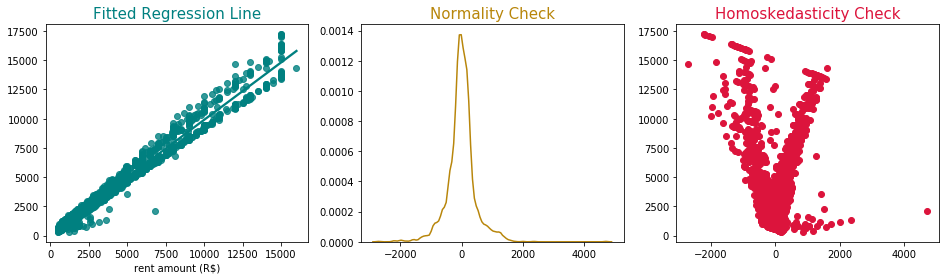

In [159]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred1,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred1)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred1,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing Ridge Regression

In [160]:
model2 = Ridge(alpha=10)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print("Training Score",model2.score(X_train,y_train))
print("Validation Score",model2.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred2))
print("MSE",mean_squared_error(y_test,y_pred2))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred2)))

l4.append("Ridge Regression")
l5.append(model2.score(X_train,y_train))
l6.append(model2.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred2))
l8.append(mean_squared_error(y_test,y_pred2))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred2)))

Training Score 0.9779185316775271
Validation Score 0.9805440242117414

MAE:- 310.33458388030033
MSE 212989.99937114678
RMSE 461.5083957753605


Text(0.5,1,'Homoskedasticity Check')

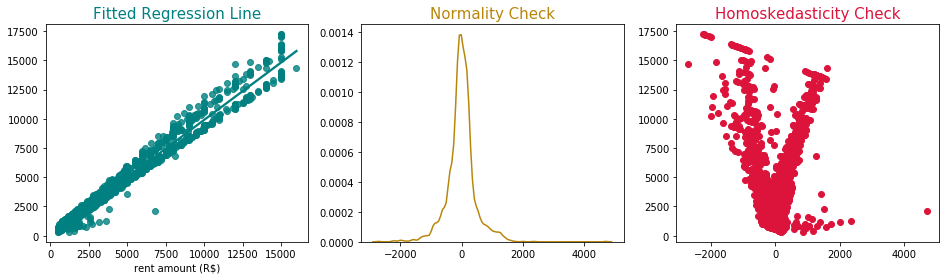

In [161]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred2,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred2)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred2,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing Lasso Regression

In [162]:
model3 = Lasso(alpha=0.001)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
print("Training Score",model3.score(X_train,y_train))
print("Validation Score",model3.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred3))
print("MSE",mean_squared_error(y_test,y_pred3))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred3)))

l4.append("Lasso Regression")
l5.append(model3.score(X_train,y_train))
l6.append(model3.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred3))
l8.append(mean_squared_error(y_test,y_pred3))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred3)))

Training Score 0.9779190400673198
Validation Score 0.9805460963727517

MAE:- 310.83029199347266
MSE 212967.31484598602
RMSE 461.48381861771276


Text(0.5,1,'Homoskedasticity Check')

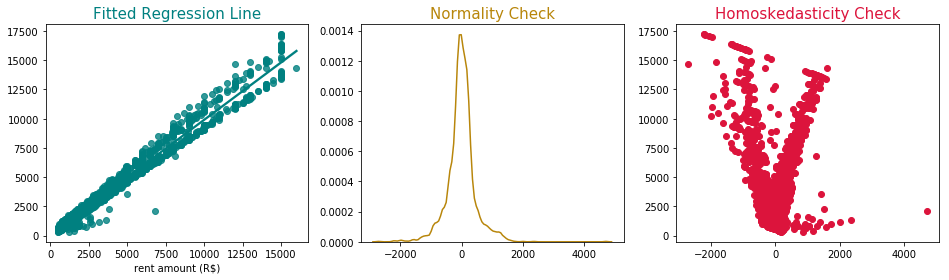

In [163]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred3,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred3)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred3,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Imlementing ElasticNet Regression

In [164]:
model4 = ElasticNet(alpha=0.01,l1_ratio=0.8)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
print("Training Score",model4.score(X_train,y_train))
print("Validation Score",model4.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred4))
print("MSE",mean_squared_error(y_test,y_pred4))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred4)))

l4.append("ElasticNet Regression")
l5.append(model4.score(X_train,y_train))
l6.append(model4.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred4))
l8.append(mean_squared_error(y_test,y_pred4))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred4)))

Training Score 0.97791774865924
Validation Score 0.9805424436565522

MAE:- 310.0310227412595
MSE 213007.3021501176
RMSE 461.5271412930312


Text(0.5,1,'Homoskedasticity Check')

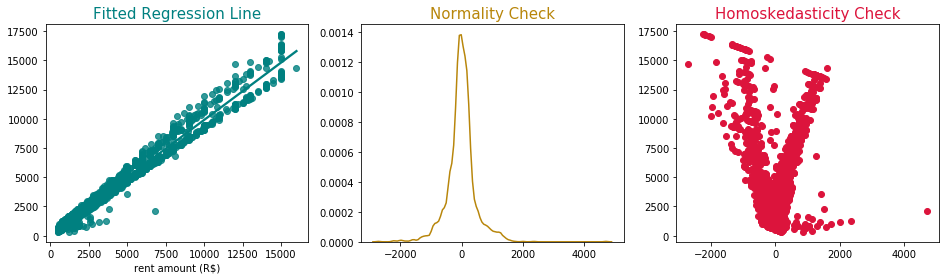

In [165]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred4,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred4)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred4,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing Decision Tree Regressor

In [166]:
model5 = DecisionTreeRegressor(max_depth=10)
model5.fit(X_train,y_train)
y_pred5 = model5.predict(X_test)
print("Training Score",model5.score(X_train,y_train))
print("Validation Score",model5.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred5))
print("MSE",mean_squared_error(y_test,y_pred5))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred5)))

l4.append("Decision Tree Regressor")
l5.append(model5.score(X_train,y_train))
l6.append(model5.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred5))
l8.append(mean_squared_error(y_test,y_pred5))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred5)))

Training Score 0.9951968477698244
Validation Score 0.9841392153734374

MAE:- 183.95094652039595
MSE 173632.43788965553
RMSE 416.69225801501943


Text(0.5,1,'Homoskedasticity Check')

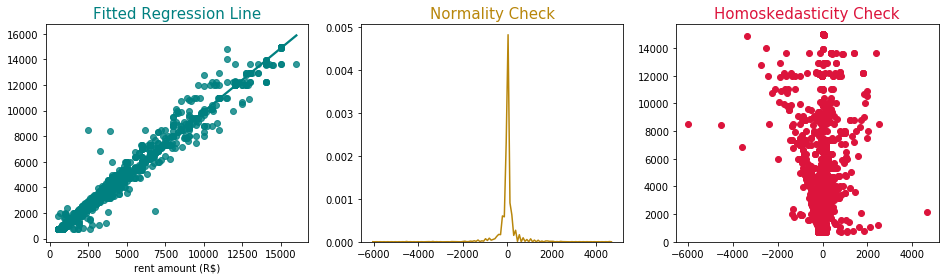

In [167]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred5,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred5)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred5,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing Random Forest Regressor

In [168]:
model6 = RandomForestRegressor(n_estimators=250,max_depth=10)
model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)
print("Training Score",model6.score(X_train,y_train))
print("Validation Score",model6.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred6))
print("MSE",mean_squared_error(y_test,y_pred6))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred6)))

l4.append("Random Forest Regressor")
l5.append(model6.score(X_train,y_train))
l6.append(model6.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred6))
l8.append(mean_squared_error(y_test,y_pred6))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred6)))

Training Score 0.9950746874935534
Validation Score 0.9891659604882402

MAE:- 169.2664448727606
MSE 118603.25557093111
RMSE 344.38823378700255


Text(0.5,1,'Homoskedasticity Check')

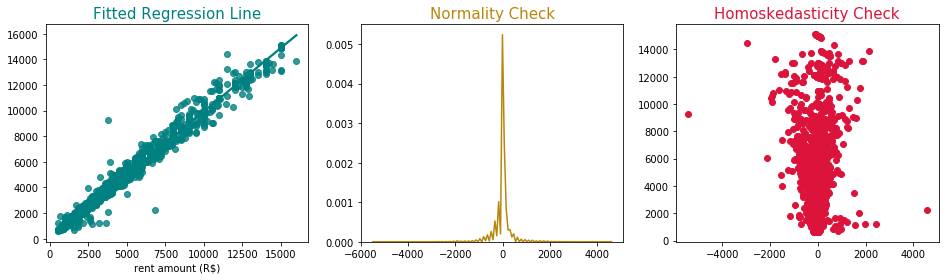

In [169]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred6,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred6)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred6,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing AdaBoost Regressor

In [170]:
model7 = AdaBoostRegressor(n_estimators=150)
model7.fit(X_train,y_train)
y_pred7 = model7.predict(X_test)
print("Training Score",model7.score(X_train,y_train))
print("Validation Score",model7.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred7))
print("MSE",mean_squared_error(y_test,y_pred7))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred7)))

l4.append("Adaboost Regressor")
l5.append(model7.score(X_train,y_train))
l6.append(model7.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred7))
l8.append(mean_squared_error(y_test,y_pred7))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred7)))

Training Score 0.9569589952132401
Validation Score 0.9538103935534918

MAE:- 518.6987864763463
MSE 505650.5186407718
RMSE 711.0910761926153


Text(0.5,1,'Homoskedasticity Check')

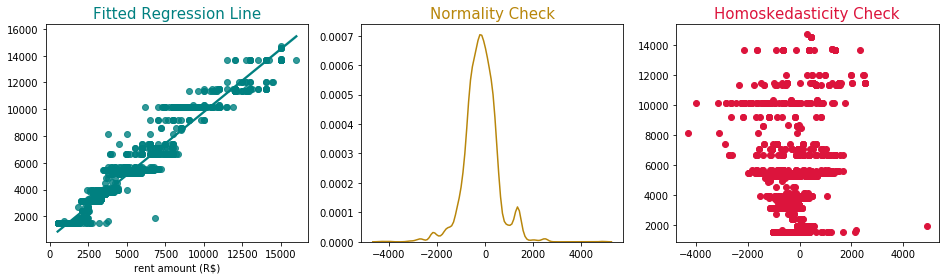

In [171]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred7,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred7)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred7,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing Gradient Boosting Regressor

In [172]:
model8 = GradientBoostingRegressor(n_estimators=300,learning_rate=0.5)
model8.fit(X_train,y_train)
y_pred8 = model8.predict(X_test)
print("Training Score",model8.score(X_train,y_train))
print("Validation Score",model8.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred8))
print("MSE",mean_squared_error(y_test,y_pred8))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred8)))

l4.append("Gradient Boosting Regressor")
l5.append(model8.score(X_train,y_train))
l6.append(model8.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred8))
l8.append(mean_squared_error(y_test,y_pred8))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred8)))

Training Score 0.9957294690833589
Validation Score 0.9838531427709098

MAE:- 186.35167248881604
MSE 176764.15454553318
RMSE 420.4332938119116


Text(0.5,1,'Homoskedasticity Check')

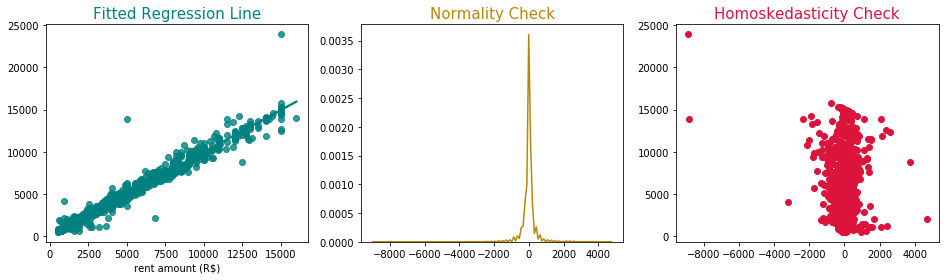

In [173]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred8,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred8)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred8,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing KNeighbors Regressor

In [174]:
model9 = KNeighborsRegressor(n_neighbors=10)
model9.fit(X_train,y_train)
y_pred9 = model9.predict(X_test)
print("Training Score",model9.score(X_train,y_train))
print("Validation Score",model9.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred9))
print("MSE",mean_squared_error(y_test,y_pred9))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred9)))

l4.append("KNeighbors Regressor")
l5.append(model9.score(X_train,y_train))
l6.append(model9.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred9))
l8.append(mean_squared_error(y_test,y_pred9))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred9)))

Training Score 0.9710319898336153
Validation Score 0.9782143789387991

MAE:- 273.6912832023943
MSE 238493.2766479611
RMSE 488.35773429726805


Text(0.5,1,'Homoskedasticity Check')

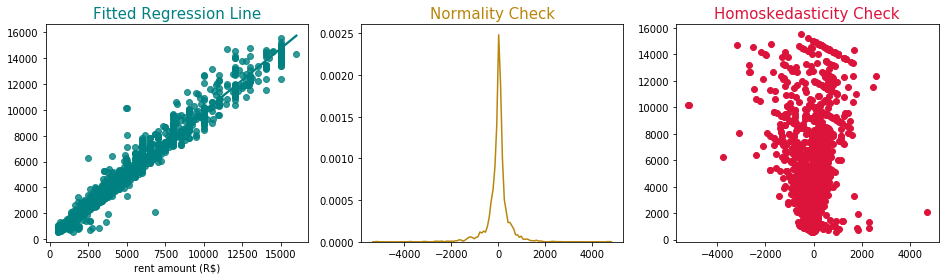

In [175]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred9,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred9)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred9,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing Support Vector Regressor

In [176]:
model10 = SVR(kernel='linear',gamma=0.45,C=0.4)
model10.fit(X_train,y_train)
y_pred10 = model10.predict(X_test)
print("Training Score",model10.score(X_train,y_train))
print("Validation Score",model10.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred10))
print("MSE",mean_squared_error(y_test,y_pred10))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred10)))

l4.append("Support Vector Regressor")
l5.append(model10.score(X_train,y_train))
l6.append(model10.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred10))
l8.append(mean_squared_error(y_test,y_pred10))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred10)))

Training Score 0.9618036791638037
Validation Score 0.9653539634175666

MAE:- 266.8279945306701
MSE 379279.8361909167
RMSE 615.8569932954539


Text(0.5,1,'Homoskedasticity Check')

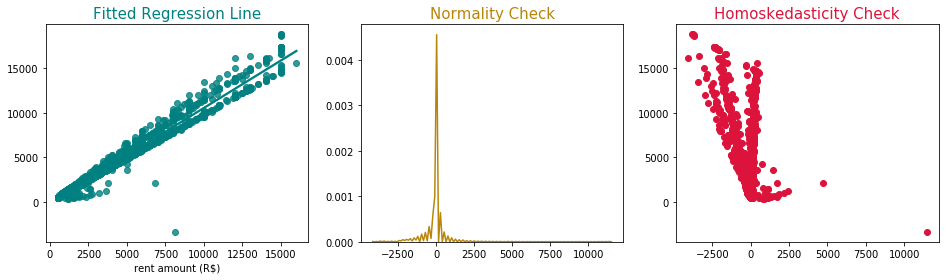

In [177]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred10,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred10)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred10,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

# Implementing XGBoost regressor

In [178]:
model11 = XGBRegressor(n_estimators=500,objective='reg:squarederror')
model11.fit(X_train,y_train)
y_pred11 = model11.predict(X_test)
print("Training Score",model11.score(X_train,y_train))
print("Validation Score",model11.score(X_test,y_test))
print()
print("MAE:-",mean_absolute_error(y_test,y_pred11))
print("MSE",mean_squared_error(y_test,y_pred11))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred11)))

l4.append("XGBoost Regressor")
l5.append(model11.score(X_train,y_train))
l6.append(model11.score(X_test,y_test))
l7.append(mean_absolute_error(y_test,y_pred11))
l8.append(mean_squared_error(y_test,y_pred11))
l9.append(np.sqrt(mean_squared_error(y_test,y_pred11)))

Training Score 0.9928649498986838
Validation Score 0.9901788775607856

MAE:- 176.3333561672863
MSE 107514.56955526149
RMSE 327.8941438258108


Text(0.5,1,'Homoskedasticity Check')

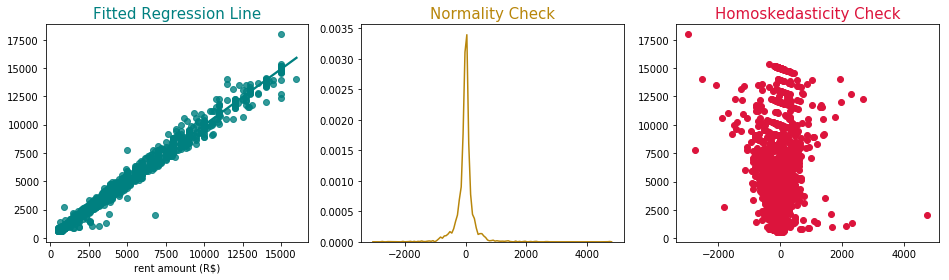

In [179]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x=y_test,y=y_pred11,truncate=True,ax=axes[0],color='teal')
axes[0].set_title("Fitted Regression Line",fontsize=15,color='teal')

l1 = list(y_test)
l2 = list(y_pred11)
l3 = [l1[i] - l2[i] for i in range(len(y_test))]
sns.kdeplot(l3,ax=axes[1],color='darkgoldenrod')
axes[1].set_title("Normality Check",fontsize=15,color='darkgoldenrod')

axes[2].scatter(pd.Series(l3),y_pred11,color='crimson')
axes[2].set_title("Homoskedasticity Check",fontsize=15,color='crimson')

In [180]:
lx = list(zip(l4,l5,l6,l7,l8,l9))
model_comparison = pd.DataFrame(lx,columns=['Model','Training Score','Validation Score','MAE','MSE','RMSE'])
model_comparison.sort_values(by='RMSE',ascending=True)

,Model,Training Score,Validation Score,MAE,MSE,RMSE
10,XGBoost Regressor,0.992865,0.990179,176.333356,107514.569555,327.894144
5,Random Forest Regressor,0.995075,0.989166,169.266445,118603.255571,344.388234
4,Decision Tree Regressor,0.995197,0.984139,183.950947,173632.437890,416.692258
7,Gradient Boosting Regressor,0.995729,0.983853,186.351672,176764.154546,420.433294
0,Linear Regression,0.977919,0.980546,310.832047,212967.280935,461.483782
2,Lasso Regression,0.977919,0.980546,310.830292,212967.314846,461.483819
1,Ridge Regression,0.977919,0.980544,310.334584,212989.999371,461.508396
3,ElasticNet Regression,0.977918,0.980542,310.031023,213007.302150,461.527141
8,KNeighbors Regressor,0.971032,0.978214,273.691283,238493.276648,488.357734
9,Support Vector Regressor,0.961804,0.965354,266.827995,379279.836191,615.856993
